## Belajar Bersama www.jendelastatistik.com

# Deskriptif dan Linear Regresi 

Deskriptif adalah teknik untuk menggambarkan secara umum data yang meliputi nilai dari pemusatan dan sebaran data.

Linear Regresi adalah teknik yang mengukur hubungan antara dua variabel.

Ide dasar linear regresi adalah bagaimana menemukan persamaan garis yang tepat untuk menggambarkan hubungan antara variabel prediktor (independent) = $X$ dengan variabel respon (dependent) = $Y$.

### Formula Dasar Linear Regresi

$$ y = \alpha + \beta x + \epsilon $$

$\beta$ adalah slope, $\alpha$ adalah intersep dari Y dan $\epsilon$ adalah sebaran selisih nilai diantara garis linear (hahaha).

Nilai $\alpha$ representasi dari nilai y ketika nilai $\beta$ = 0



In [1]:
# imports
import pandas as pd

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [5]:
data.mode()

,TV,Radio,Newspaper,Sales
0,17.2,4.1,8.7,9.7
1,76.4,5.7,9.3,NaN
2,109.8,NaN,25.6,NaN
3,177.0,NaN,NaN,NaN
4,184.9,NaN,NaN,NaN
5,197.6,NaN,NaN,NaN
6,199.8,NaN,NaN,NaN
7,222.4,NaN,NaN,NaN
8,237.4,NaN,NaN,NaN
9,240.1,NaN,NaN,NaN


In [7]:
import numpy as np

In [10]:
dataSorted = sorted(data.Sales)

In [12]:
print(dataSorted[:10])

[1.6000000000000001, 3.2000000000000002, 4.7999999999999998, 5.2999999999999998, 5.2999999999999998, 5.5, 5.5999999999999996, 5.7000000000000002, 5.9000000000000004, 6.5999999999999996]


In [13]:
print(data.quantile(0.1))

TV           24.88
Radio         3.40
Newspaper     5.99
Sales         7.96
Name: 0.1, dtype: float64


In [14]:
print(data.var())

TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.221853
dtype: float64


In [15]:
var=data.std()**2
print(var)

TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.221853
dtype: float64


In [16]:
interquartile = data.quantile(0.75) - data.quantile(0.25)
print(interquartile)

TV           144.450
Radio         26.550
Newspaper     32.350
Sales          7.025
dtype: float64


In [17]:
Range = max(data.Sales) - min(data.Sales)
print(Range)

25.4


In [18]:
data.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [20]:
print(data["Sales"].cov(data.Radio))

44.6356884422


In [21]:
print(data["Sales"].var())

27.2218530151


In [22]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [23]:
print(data["TV"].corr(data.Sales))

0.782224424862


In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

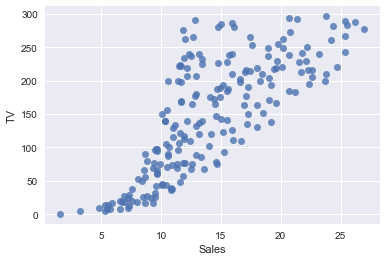

In [36]:
sns.regplot('Sales', 'TV', 
           data=data, 
           fit_reg=False)

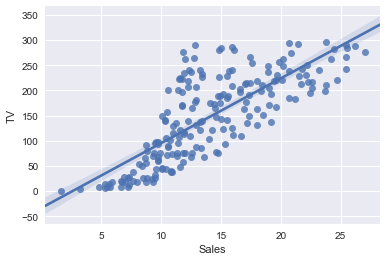

In [37]:
sns.regplot('Sales', 'TV', 
           data=data, 
           fit_reg=True)

In [39]:
import statsmodels.formula.api as smf

In [40]:
lm=smf.ols(formula='Sales ~ TV', data=data).fit()


In [41]:
print(lm.params)

Intercept    7.032594
TV           0.047537
dtype: float64


In [43]:
data["Sales"].min()

1.6000000000000001

In [44]:
data.TV[(data.TV == 0)]

Series([], Name: TV, dtype: float64)

In [46]:
lm.predict({'TV':[11]})

array([ 7.55549659])

In [47]:
print(lm.predict({'TV':[100]}))

[ 11.78625759]


In [49]:
print(data["TV"].min())
print(data["TV"].max())

0.7
296.4


In [50]:
print(lm.rsquared)

0.61187505085


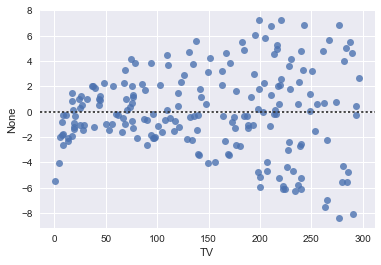

In [51]:
sns.residplot(data.TV,lm.resid)

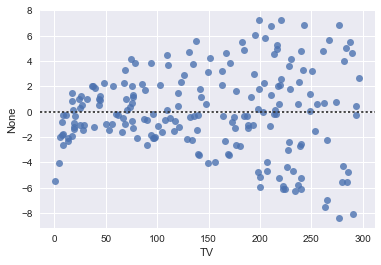

In [52]:
sns.residplot(data.TV,lm.resid)

In [54]:
import statsmodels.graphics.api as smg

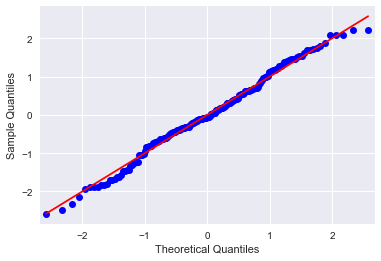

In [55]:
fig = plt.figure()
fig=smg.qqplot(lm.resid,fit=True, line='s')

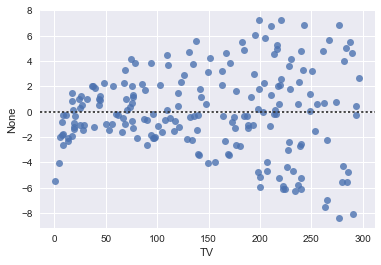

In [56]:
sns.residplot(data.TV,lm.resid)

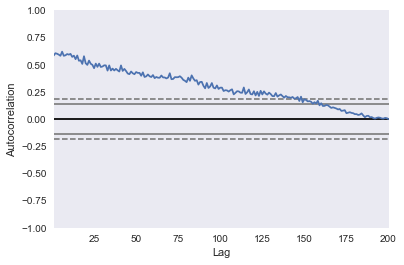

In [57]:
pd.tools.plotting.autocorrelation_plot(data)

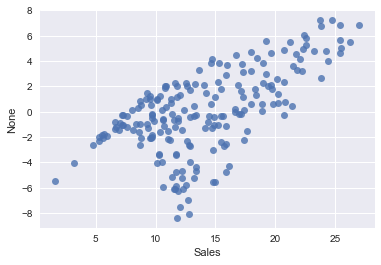

In [58]:
sns.regplot('Sales',lm.resid,
          data=data, 
          fit_reg=False)